## <b>1. Import Packages</b>

In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Masking, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Masking, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, GRU, Dense
from tensorflow.keras.regularizers import L1L2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from src import DATA_DIR

<br></br>
## <b>2. Using RNN for text classification</b>

### <b>2.1. Reshape Dataset</b>

In [28]:
# Define the list of texts
texts = [
    "The cat chased the mouse",
    "The dog ran away",
    "The mouse ran up the clock",
    "The cat sat on the mat",
    "The dog chased the cat"
]

# Define the labels for each text
labels = np.array([0, 1, 0, 0, 1])

# Define the vocabulary size and maximum sequence length
vocab_size = 50
max_seq_length = 6

# Create a tokenizer to convert words to integers
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)

# Convert the texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad the sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)

# Reshape the padded sequences to have the correct shape
padded_sequences = np.reshape(padded_sequences, (len(texts), max_seq_length, 1))
padded_sequences.shape

(5, 6, 1)

<br></br>
### <b>2.2. Vanilla RNN</b>

In [29]:
max_seq_length = 6

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(max_seq_length, 1)))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=10, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 [==============================] - 0s 253ms/step - loss: 0.0416 - accuracy: 1.0000
Training loss: 0.04155457019805908
Training accuracy: 1.0


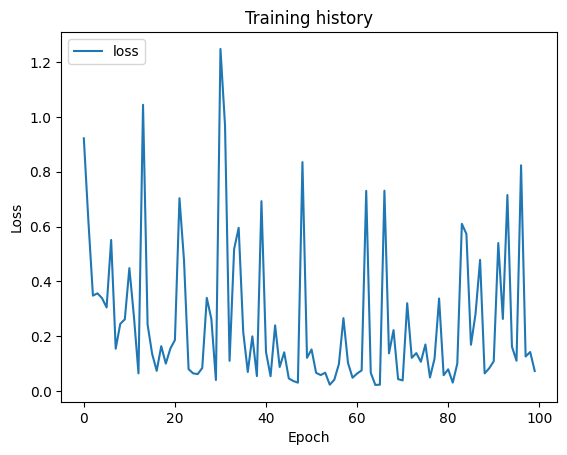

In [30]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

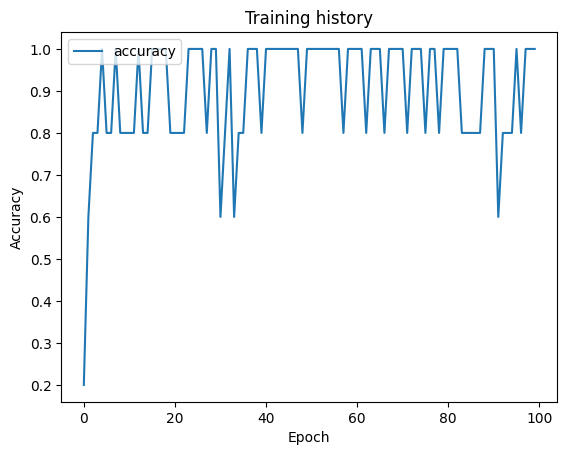

In [31]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [32]:
# Use the model to make predictions on new data
new_texts = [
    "The cat sat on the mat",
    "The dog chased the mouse",
    "The mouse ran up the clock",
    "The cat chased the dog"
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)
new_padded_sequences = np.reshape(new_padded_sequences, (len(new_texts), max_seq_length, 1))
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 [==============================] - 0s 210ms/step
[[4.5561264e-04]
 [8.4753692e-01]
 [1.4313862e-04]
 [6.1512622e-04]]


<br></br>
### <b>2.3. LSTM</b>

In [33]:
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(max_seq_length, 1)))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=False))
model.add(Reshape((-1, 256)))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2, input_shape=(5, 1)))
model.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 [==============================] - 0s 369ms/step - loss: 0.1377 - accuracy: 1.0000
Training loss: 0.13772864639759064
Training accuracy: 1.0


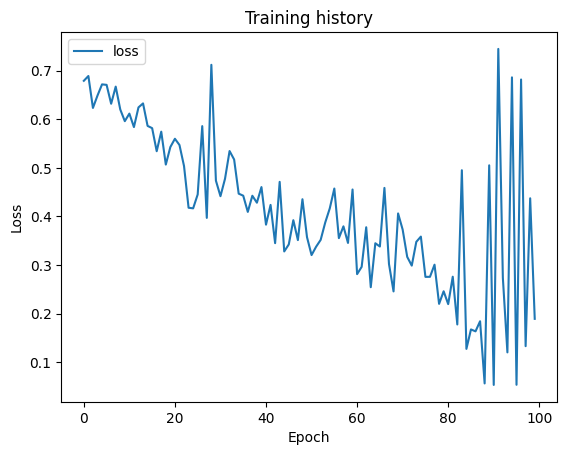

In [34]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

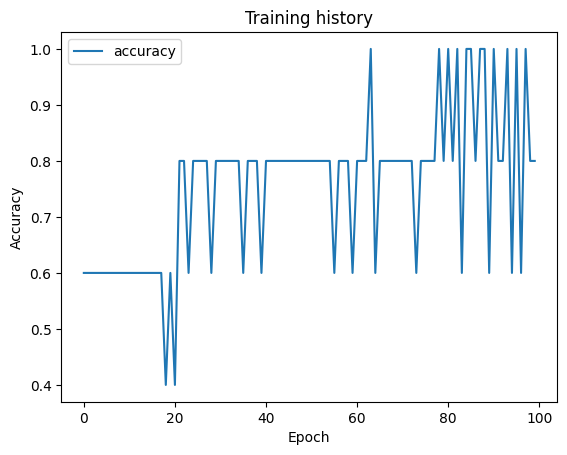

In [35]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [36]:
# Use the model to make predictions on new data
new_texts = [
    "The cat sat on the mat",
    "The dog chased the mouse",
    "The mouse ran up the clock",
    "The cat chased the dog"
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)
new_padded_sequences = np.reshape(new_padded_sequences, (len(new_texts), max_seq_length, 1))
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 [==============================] - 0s 426ms/step
[[1.2524266e-04]
 [3.6698240e-01]
 [2.7793634e-04]
 [1.7785078e-01]]


<br></br>
### <b>2.4. GRU</b>

In [37]:
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(max_seq_length, 1)))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 [==============================] - 0s 432ms/step - loss: 0.0036 - accuracy: 1.0000
Training loss: 0.0035844133235514164
Training accuracy: 1.0


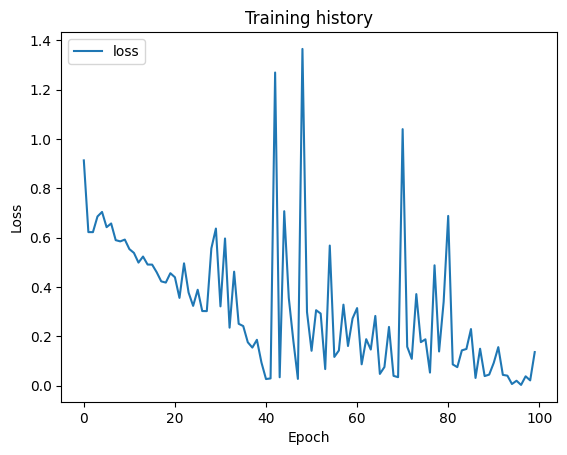

In [38]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

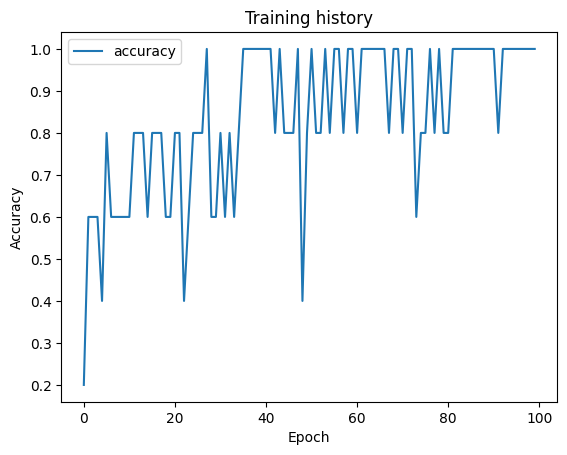

In [39]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [40]:
# Use the model to make predictions on new data
new_texts = [
    "The cat sat on the mat",
    "The dog chased the mouse",
    "The mouse ran up the clock",
    "The cat chased the dog"
]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)
new_padded_sequences = np.reshape(new_padded_sequences, (len(new_texts), max_seq_length, 1))
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 [==============================] - 0s 381ms/step
[[2.9580563e-04]
 [9.9838388e-01]
 [1.4822365e-04]
 [9.2421118e-03]]


<br></br>
## <b>3. RNN and Process Mining</b>

### <b>3.1. Simple example</b>

In [52]:
# Define the event log as a list of cases, where each case is a list of activities
event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'E', 'F'],
    ['B', 'C', 'E', 'F', 'G']
]

# Create a list of all unique activities in the event log
activities = sorted(list(set([activity for case in event_log for activity in case])))
    
# Create a dictionary that maps each activity to a unique array
activity_to_index = {activity: [int(ind == index) for ind in range(len(activities))] for index, activity in enumerate(activities)}

# Convert each activity in the event log to its corresponding array
indexed_event_log = [[activity_to_index[activity] for activity in case] for case in event_log]

indexed_event_log

# Pad the indexed event_log to a fixed length
max_case_length = max([len(case) for case in indexed_event_log])
padded_sequences = pad_sequences(indexed_event_log, maxlen=max_case_length)

# Set labels
labels = np.array([0, 1, 0, 0])

<br></br>
#### <b>3.1.1.Vanilla RNN</b>

In [53]:
sequence_size = padded_sequences.shape[1:]

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=sequence_size))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(SimpleRNN(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 [==============================] - 0s 279ms/step - loss: 3.3983e-05 - accuracy: 1.0000
Training loss: 3.398257467779331e-05
Training accuracy: 1.0


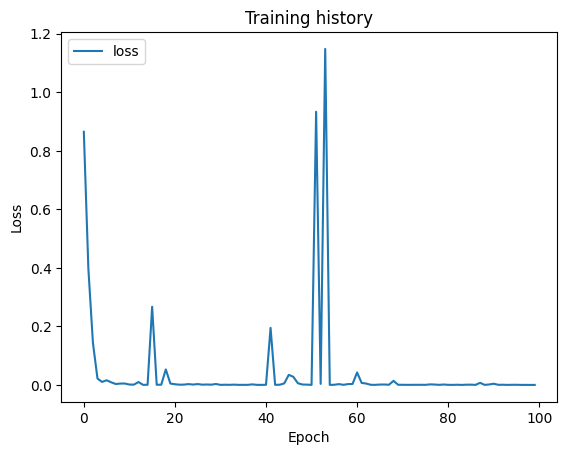

In [54]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

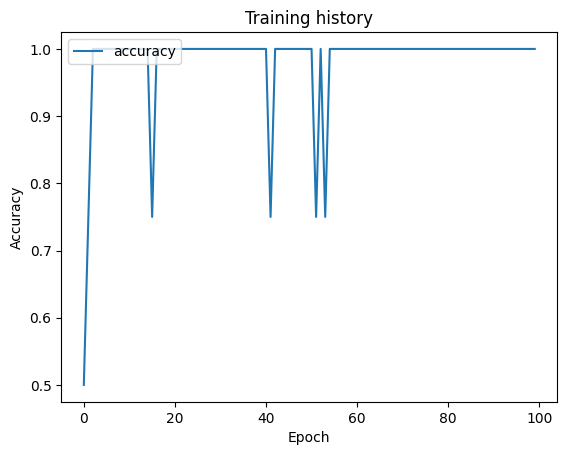

In [55]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [56]:
# Use the model to make predictions on new data
new_event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'C', 'F'],
    ['B', 'C', 'E', 'B']
]
new_sequences = [[activity_to_index[activity] for activity in case] for case in new_event_log]
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_case_length)
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 [==============================] - 0s 223ms/step
[[7.1158036e-05]
 [9.9997967e-01]
 [9.0215717e-06]
 [6.3461411e-01]]


<br></br>
#### <b>3.1.2. LSTM</b>

In [57]:
sequence_size = padded_sequences.shape[1:]

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=sequence_size))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=False))
model.add(Reshape((-1, 256)))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.2, input_shape=(5, 1)))
model.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 [==============================] - 0s 383ms/step - loss: 0.0014 - accuracy: 1.0000
Training loss: 0.001434887875802815
Training accuracy: 1.0


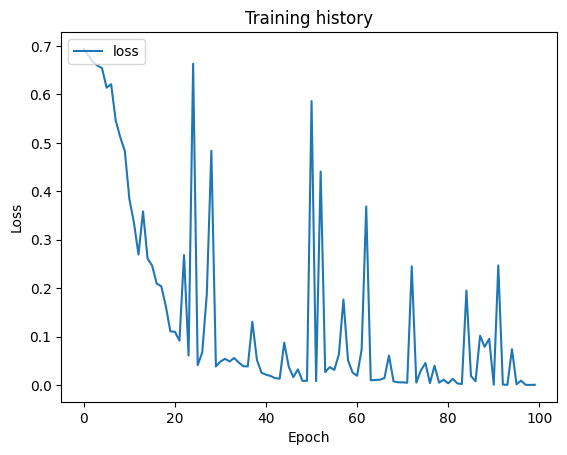

In [58]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

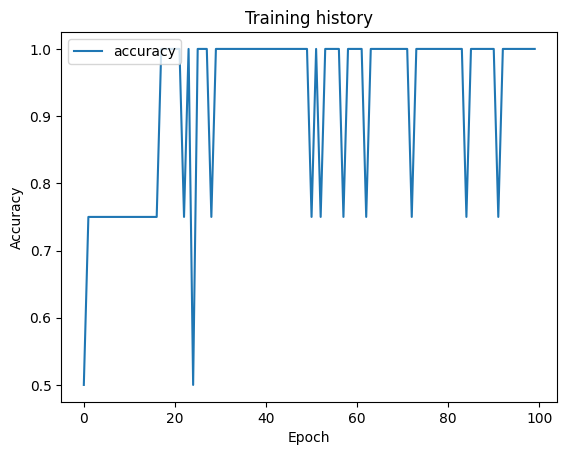

In [59]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [60]:
# Use the model to make predictions on new data
new_event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'C', 'F'],
    ['B', 'C', 'E', 'B']
]
new_sequences = [[activity_to_index[activity] for activity in case] for case in new_event_log]
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_case_length)
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 [==============================] - 0s 357ms/step
[[9.8462688e-06]
 [9.9428672e-01]
 [4.2915076e-08]
 [2.1390472e-08]]


<br></br>
### <b>3.1.3. GRU</b>

In [61]:
sequence_size = padded_sequences.shape[1:]

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=sequence_size))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(padded_sequences, labels, epochs=100, batch_size=2, verbose=0)

# Evaluate the model on the training data
loss, acc = model.evaluate(padded_sequences, labels)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 [==============================] - 0s 433ms/step - loss: 7.6888e-04 - accuracy: 1.0000
Training loss: 0.0007688761688768864
Training accuracy: 1.0


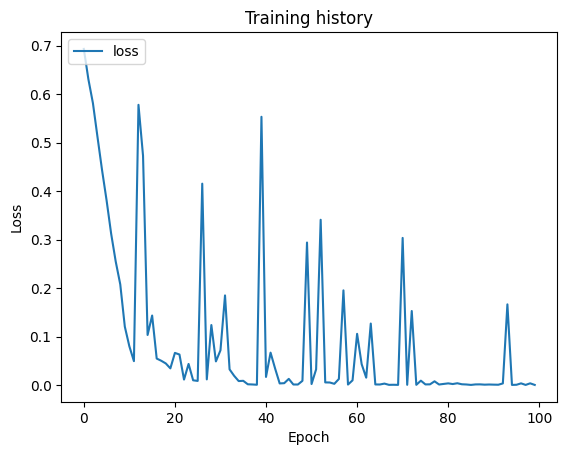

In [62]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

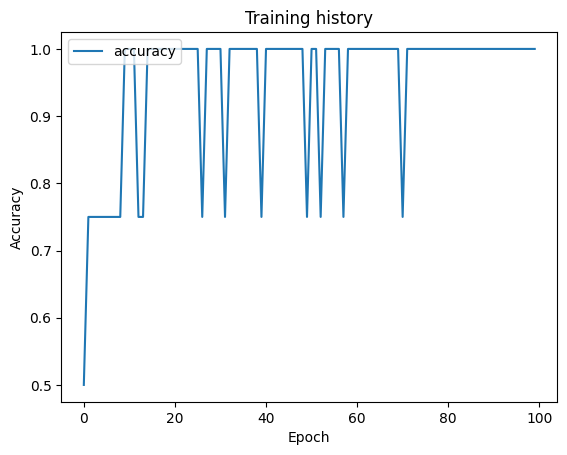

In [63]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

In [64]:
# Use the model to make predictions on new data
new_event_log = [
    ['A', 'B', 'C', 'D'],
    ['A', 'C', 'D', 'E'],
    ['B', 'D', 'C', 'F'],
    ['B', 'C', 'E', 'B']
]
new_sequences = [[activity_to_index[activity] for activity in case] for case in new_event_log]
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_case_length)
predictions = model.predict(new_padded_sequences)
print(predictions)

1/1 [==============================] - 0s 372ms/step
[[1.10067114e-04]
 [9.97039080e-01]
 [2.43943578e-06]
 [9.42235602e-07]]


<br></br>
### <b>3.2. Next Activity Prediction</b>

#### <b>3.2.1. Feature engineering</b>

In [42]:
# Import Eventlog
event_log = pd.read_csv(DATA_DIR / 'Example/Running_Example/running-example.csv', sep=";")
event_log.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [43]:
# Change "timestamp" format
event_log["timestamp"] = event_log["timestamp"].str.split("+", expand=True).iloc[:,0]
event_log['timestamp'] = pd.to_datetime(event_log['timestamp'])
event_log.sort_values(['case_id', 'timestamp'], inplace=True)
event_log.reset_index(drop=True, inplace=True)
event_log.head()

,case_id,activity,timestamp,costs,resource
0,1,register request,2010-12-30 11:02:00,50,Pete
1,1,examine thoroughly,2010-12-31 10:06:00,400,Sue
2,1,check ticket,2011-01-05 15:12:00,100,Mike
3,1,decide,2011-01-06 11:18:00,200,Sara
4,1,reject request,2011-01-07 14:24:00,200,Pete


In [44]:
# Calculate case_total_cost, total_spend and total_spend
for name, case in event_log.groupby('case_id'):
    event_log.loc[event_log.case_id == name, 'case_total_cost'] = sum(case.costs)

event_log['total_spend'] = event_log.groupby('case_id')['costs'].cumsum()
event_log['remain_cost'] = event_log.case_total_cost - event_log.total_spend

event_log.head()

,case_id,activity,timestamp,costs,resource,case_total_cost,total_spend,remain_cost
0,1,register request,2010-12-30 11:02:00,50,Pete,950.0,50,900.0
1,1,examine thoroughly,2010-12-31 10:06:00,400,Sue,950.0,450,500.0
2,1,check ticket,2011-01-05 15:12:00,100,Mike,950.0,550,400.0
3,1,decide,2011-01-06 11:18:00,200,Sara,950.0,750,200.0
4,1,reject request,2011-01-07 14:24:00,200,Pete,950.0,950,0.0


<br></br>
#### <b>3.2.2. Embedding EventLog</b>

In [45]:
# Group the DataFrame by column case_id
grouped = event_log.groupby('case_id')

# Convert the grouped DataFrame to a numpy array
case_activities = np.array([grouped.get_group(x)['activity'].values for x in grouped.groups], dtype=object)
case_resources = np.array([grouped.get_group(x)['resource'].values for x in grouped.groups], dtype=object)

# Create a list of all unique activities and resources in the event log
activities_list = sorted(list(set([activity for case in case_activities for activity in case])))
resources_list = sorted(list(set([resource for case in case_resources for resource in case])))

# Create a dictionary that maps each activity and resourse to a unique array
activity_index = {activity: [int(ind == index) for ind in range(len(activities_list))] for index, activity in enumerate(activities_list)}
resource_index = {resource: [int(ind == index) for ind in range(len(resources_list))] for index, resource in enumerate(resources_list)}

# Convert each activity and resourse in the event log to its corresponding array
embedded_activity = [[activity_index[activity] for activity in case] for case in case_activities]
embedded_resource = [[resource_index[resource] for resource in case] for case in case_resources]

# Concatenate the two lists and indexed event log
embedded_eventlog = []
for case in zip(embedded_activity, embedded_resource):
    case_list = []
    for activity, resource in zip(case[0], case[1]):
        case_list.append(activity + resource)
    embedded_eventlog.append(case_list)

In [ ]:
embedded_eventlog

[[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0

<br></br>
#### <b>3.2.3. Create X and Y</b>

In [57]:
event_log.sort_values(["case_id", "timestamp"], inplace=True)
event_log.reset_index(drop=True, inplace=True)

event_log['next_activity'] = event_log.activity.shift(-1)
event_log.loc[event_log.case_id != event_log.case_id.shift(-1), 'next_activity'] = 'End'

case_next_activities = np.array([grouped.get_group(x)['next_activity'].values for x in grouped.groups], dtype=object)
next_activity_list = sorted(list(set([nextactivity for case in case_next_activities for nextactivity in case])))
next_activity_index = {nextactivity: [int(ind == index) for ind in range(len(next_activity_list))] for index, nextactivity in enumerate(next_activity_list)}
embedded_next_activity = [[next_activity_index[activity] for activity in case] for case in case_next_activities]

X_dataset = []
Y_dataset = []

for case, target in zip(embedded_eventlog, embedded_next_activity):
    for i in range(len(case)):
        X_dataset.append(case[:i+1])
        Y_dataset.append(target[i])

Y_dataset = np.array(Y_dataset)

# Pad the indexed event_log to a fixed length
max_case_length = max([len(case) for case in embedded_eventlog])
X_dataset = pad_sequences(X_dataset, maxlen=max_case_length)

<br></br>
#### <b>3.2.4. Train LSTM model</b>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=X_train.shape[1:]))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=2, verbose=0)

In [60]:
# Evaluate the model on the training data
loss, acc = model.evaluate(X_test, y_test)
print("Training loss:", loss)
print("Training accuracy:", acc)

1/1 [==============================] - 0s 389ms/step - loss: 0.2236 - accuracy: 0.6667
Training loss: 0.2235938161611557
Training accuracy: 0.6666666865348816


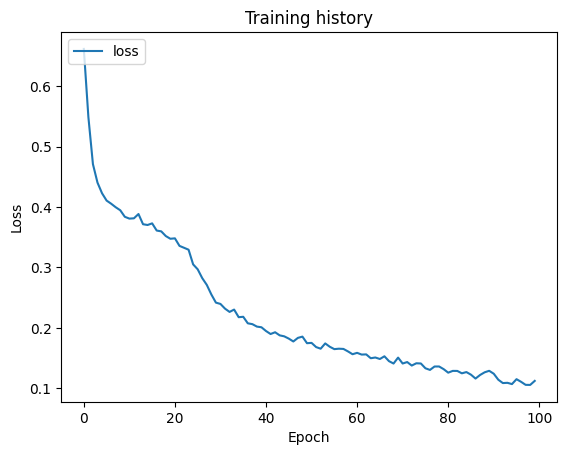

In [61]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

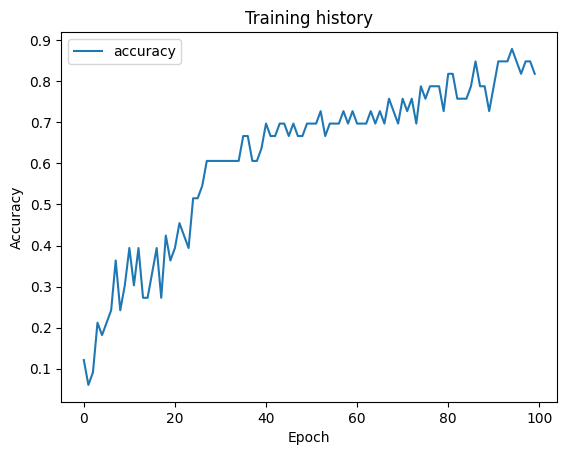

In [62]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

<br></br>
### <b>3.3. Remain Cost Prediction</b>

#### <b>3.3.1. Create X and Y datasets</b>

In [63]:
# Group the DataFrame by column case_id
grouped = event_log.groupby('case_id')

# Convert the grouped DataFrame to a numpy array
case_activities = np.array([grouped.get_group(x)['activity'].values for x in grouped.groups], dtype=object)
case_resources = np.array([grouped.get_group(x)['resource'].values for x in grouped.groups], dtype=object)
case_remain_cost = np.array([grouped.get_group(x)['remain_cost'].values for x in grouped.groups], dtype=object)


# Create a list of all unique activities and resources in the event log
activities = sorted(list(set([activity for case in case_activities for activity in case])))
resources = sorted(list(set([resource for case in case_resources for resource in case])))

# Create a dictionary that maps each activity and resourse to a unique array
activity_index = {activity: [int(ind == index) for ind in range(len(activities))] for index, activity in enumerate(activities)}
resource_index = {resource: [int(ind == index) for ind in range(len(resources))] for index, resource in enumerate(resources)}

# Convert each activity and resourse in the event log to its corresponding array
embedded_activity = [[activity_index[activity] for activity in case] for case in case_activities]
embedded_resource = [[resource_index[resource] for resource in case] for case in case_resources]

# Concatenate the two lists
embedded_eventlog = []
for case in zip(embedded_activity, embedded_resource, case_remain_cost):
    case_list = []
    for activity, resource, total_spend in zip(case[0], case[1], case[2]):
        case_list.append(activity + resource + [total_spend])
    embedded_eventlog.append(case_list)
    
embedded_eventlog[1]

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 900.0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 800.0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 400.0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 200.0],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.0]]

In [64]:
# Create Y
event_log.sort_values(["case_id", "timestamp"], inplace=True)
event_log.reset_index(drop=True, inplace=True)

nextactivitycost = np.array([grouped.get_group(x)['case_total_cost'].values for x in grouped.groups], dtype=object)

X_dataset = []
Y_dataset = []

for case, target in zip(embedded_eventlog, nextactivitycost):
    for i in range(len(case)):
        X_dataset.append(case[:i+1])
        Y_dataset.append(target[i])
        
Y_dataset = np.array(Y_dataset)
max_case_length = max([len(case) for case in embedded_eventlog])
X_dataset = pad_sequences(X_dataset, maxlen=max_case_length)

<br></br>
#### <b>3.3.2. Scale X and Y datasets</b>

In [67]:
# Reshape tensor
reshaped_tensor = np.reshape(X_dataset, (42 * 13, 15))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the reshaped tensor
scaler.fit(reshaped_tensor)

# Transform the reshaped tensor with StandardScaler
transformed_reshaped_tensor = scaler.transform(reshaped_tensor)

# Reshape the transformed tensor back to its original shape
X_dataset = np.reshape(transformed_reshaped_tensor, (42, 13, 15))


# Reshape tensor
y_reshaped = Y_dataset.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the reshaped 'y'
scaler.fit(y_reshaped)

# Transform the reshaped 'y' with StandardScaler
transformed_y = scaler.transform(y_reshaped)

# Reshape the transformed 'y' back to its original shape
Y_dataset = transformed_y.flatten()

#### 
### Train LSTM Model

In [68]:
import tensorflow.keras.backend as K

X_train, X_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size=0.2, random_state=42)

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))


# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=X_train.shape[1:]))
model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1, return_sequences=True, activation='tanh'))
model.add(LSTM(units=64, dropout=0.1, recurrent_dropout=0.1, activation='tanh'))
model.add(Dense(units=1, activation='linear'))

# Compile the model with mean squared error loss
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r_squared, 'mse'])

# Train the model using X_train and y_train
history = model.fit(X_train, y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test), verbose=0)

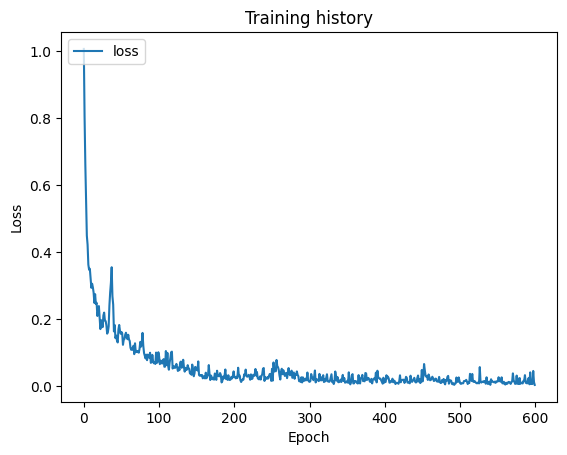

In [155]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

<br></br>
### <b>3.3. Recommender system</b>

#### <b>3.3.1. Filter activities</b>

In [65]:
# Import Eventlog
event_log = pd.read_csv(DATA_DIR / 'Real/Customer_Journey/Website_EventLog_Preprossed_With_Python.csv')

In [66]:
# Filter Activities based on duration
event_log = event_log.loc[event_log["Time_on_Page"] > 10]
event_log = event_log.loc[event_log["Time_on_Page"] <= 600]
event_log.reset_index(drop=True, inplace=True)

In [67]:
# Filter the event_log directly without creating an intermediate variable
event_log = event_log[event_log.groupby('User_ID')['Visited_Page'].transform('count') >= 3].reset_index(drop=True)
event_log.head()

,User_ID,Case_Start_Date,Activity_Start_Date,Browser,Operating_System,Device,Country,Visited_Page,Time_on_Page
0,U_1,12/21/2021 22:39:00,12/21/2021 22:54:52,B_1,OS_0,D_0,Iran,Page_4,58
1,U_1,12/21/2021 22:39:00,12/21/2021 22:55:50,B_1,OS_0,D_0,Iran,Page_5,300
2,U_1,12/21/2021 22:39:00,12/21/2021 23:33:04,B_1,OS_0,D_0,Iran,Page_6,18
3,U_5,12/6/2021 7:45:00,12/6/2021 7:45:00,B_0,OS_0,D_0,Iran,Page_14,35
4,U_5,12/6/2021 7:45:00,12/6/2021 8:33:09,B_0,OS_0,D_0,Iran,Page_14,19


In [70]:
event_log.head()

,User_ID,Case_Start_Date,Activity_Start_Date,Browser,Operating_System,Device,Country,Visited_Page,Time_on_Page
0,U_1,12/21/2021 22:39:00,12/21/2021 22:54:52,B_1,OS_0,D_0,Iran,Page_4,58
1,U_1,12/21/2021 22:39:00,12/21/2021 22:55:50,B_1,OS_0,D_0,Iran,Page_5,300
2,U_1,12/21/2021 22:39:00,12/21/2021 23:33:04,B_1,OS_0,D_0,Iran,Page_6,18
3,U_5,12/6/2021 7:45:00,12/6/2021 7:45:00,B_0,OS_0,D_0,Iran,Page_14,35
4,U_5,12/6/2021 7:45:00,12/6/2021 8:33:09,B_0,OS_0,D_0,Iran,Page_14,19


<br></br>
#### <b>3.3.2. Embedding EventLog</b>

In [88]:
# Group the DataFrame by column case_id
grouped = event_log.groupby('User_ID')

# Convert the grouped DataFrame to a numpy array
case_activities = np.array([grouped.get_group(x)['Visited_Page'].values for x in grouped.groups], dtype=object)
case_browser = np.array([grouped.get_group(x)['Browser'].values for x in grouped.groups], dtype=object)
case_OS = np.array([grouped.get_group(x)['Operating_System'].values for x in grouped.groups], dtype=object)
case_device = np.array([grouped.get_group(x)['Device'].values for x in grouped.groups], dtype=object)


# Create a list of all unique activities and other features
activities_list = sorted(event_log.Visited_Page.unique())
browser_list = sorted(event_log.Browser.unique())
OS_list = sorted(event_log.Operating_System.unique())
device_list = sorted(event_log.Device.unique())

# Create a dictionary that maps each features to a unique array
activity_index = {activity: [int(ind == index) for ind in range(len(activities_list))]
                  for index, activity in enumerate(activities_list)}

browser_index = {browser: [int(ind == index) for ind in range(len(browser_list))]
                 for index, browser in enumerate(browser_list)}

OS_index = {OS: [int(ind == index) for ind in range(len(OS_list))]
            for index, OS in enumerate(OS_list)}

device_index = {device: [int(ind == index) for ind in range(len(device_list))]
                for index, device in enumerate(device_list)}

# Convert each activity and resourse in the event log to its corresponding array
embedded_activity = [[activity_index[activity] for activity in case] for case in case_activities]
embedded_browser = [[browser_index[browser] for browser in case] for case in case_browser]
embedded_OS = [[OS_index[OS] for OS in case] for case in case_OS]
embedded_device = [[device_index[device] for device in case] for case in case_device]

# Concatenate the two lists and indexed event log
embedded_eventlog = []
for case in zip(embedded_activity, embedded_browser, embedded_OS, embedded_device):
    case_list = []
    for activity, browser, OS, device in zip(case[0], case[1], case[2], case[3]):
        case_list.append(activity + browser + OS + device)
    embedded_eventlog.append(case_list)

<br></br>
#### <b>3.3.3. Create X and Y</b>

In [105]:
event_log.sort_values(["User_ID", "User_ID"], inplace=True)
event_log.reset_index(drop=True, inplace=True)

event_log['next_activity'] = event_log.Visited_Page.shift(-1)
event_log.loc[event_log.User_ID != event_log.User_ID.shift(-1), 'next_activity'] = 'End'

case_next_activities = np.array([grouped.get_group(x)['next_activity'].values for x in grouped.groups], dtype=object)
next_activity_list = sorted(list(set([nextactivity for case in case_next_activities for nextactivity in case])))
next_activity_index = {nextactivity: [int(ind == index) for ind in range(len(next_activity_list))] for index, nextactivity in enumerate(next_activity_list)}
embedded_next_activity = [[next_activity_index[activity] for activity in case] for case in case_next_activities]

X_dataset = []
Y_dataset = []

for case, target in zip(embedded_eventlog, embedded_next_activity):
    for i in range(len(case)):
        X_dataset.append(case[:i+1])
        Y_dataset.append(target[i])

Y_dataset = np.array(Y_dataset)

# Pad the indexed event_log to a fixed length
max_case_length = max([len(case) for case in embedded_eventlog])
X_dataset = pad_sequences(X_dataset, maxlen=max_case_length)

In [109]:
X_dataset.shape

(13887, 71, 402)

<br></br>
#### <b>3.3.4. Train LSTM model</b>

In [112]:
# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=X_dataset.shape[1:]))
model.add(LSTM(units=256, dropout=0.1, recurrent_dropout=0.1, return_sequences=True))
model.add(LSTM(units=128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(units=Y_dataset.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100
batch_size = 500

# Fit the model to the training data
history = model.fit(X_dataset, Y_dataset, epochs=epochs, batch_size=batch_size, validation_split=0.15)

Epoch 1/100


2023-09-01 17:28:03.490495: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1347524904 exceeds 10% of free system memory.


24/24 [==============================] - 54s 2s/step - loss: 5.4969 - accuracy: 0.1901 - val_loss: 4.9773 - val_accuracy: 0.2006
Epoch 2/100
24/24 [==============================] - 41s 2s/step - loss: 4.7744 - accuracy: 0.2022 - val_loss: 4.7662 - val_accuracy: 0.2006
Epoch 3/100
 5/24 [=====>........................] - ETA: 31s - loss: 4.6817 - accuracy: 0.1996

KeyboardInterrupt: 

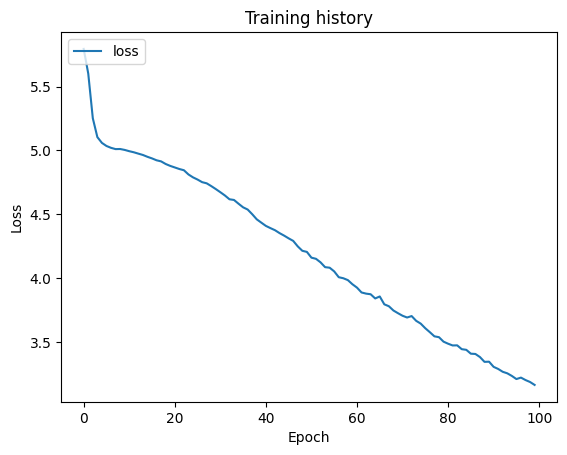

In [70]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

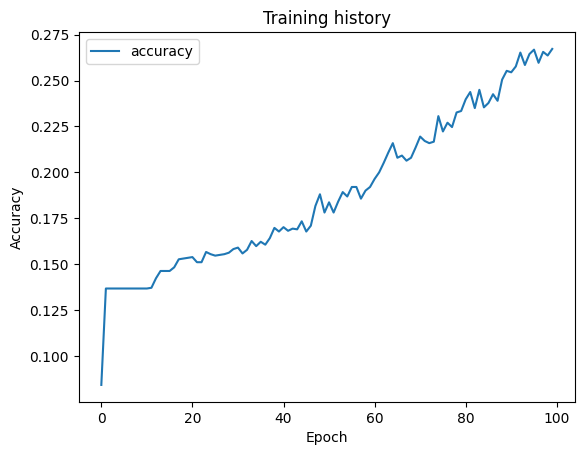

In [71]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

<br></br>
#### <b>3.3.5.Train GRU model</b>

In [72]:
# Define the LSTM model
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=X_train.shape[1:]))
model.add(GRU(units=256, dropout=0.1, recurrent_dropout=0.1, return_sequences=True))
model.add(GRU(units=128, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100
batch_size = 500

# Fit the model to the training data
history = model.fit(X_dataset, Y_dataset, epochs=epochs, batch_size=batch_size, validation_split=0.15)

Epoch 1/100
6/6 [==============================] - 8s 769ms/step - loss: 5.7716 - accuracy: 0.0962 - val_loss: 5.6476 - val_accuracy: 0.1284
Epoch 2/100
6/6 [==============================] - 4s 691ms/step - loss: 5.4873 - accuracy: 0.1368 - val_loss: 5.5147 - val_accuracy: 0.1284
Epoch 3/100
6/6 [==============================] - 4s 693ms/step - loss: 5.2328 - accuracy: 0.1368 - val_loss: 5.3844 - val_accuracy: 0.1284
Epoch 4/100
6/6 [==============================] - 4s 685ms/step - loss: 5.0750 - accuracy: 0.1368 - val_loss: 5.3174 - val_accuracy: 0.1284
Epoch 5/100
6/6 [==============================] - 4s 665ms/step - loss: 5.0168 - accuracy: 0.1368 - val_loss: 5.3698 - val_accuracy: 0.1284
Epoch 6/100
6/6 [==============================] - 5s 736ms/step - loss: 4.9945 - accuracy: 0.1368 - val_loss: 5.3770 - val_accuracy: 0.1284
Epoch 7/100
6/6 [==============================] - 5s 752ms/step - loss: 4.9604 - accuracy: 0.1368 - val_loss: 5.3286 - val_accuracy: 0.1284
Epoch 8/100
6

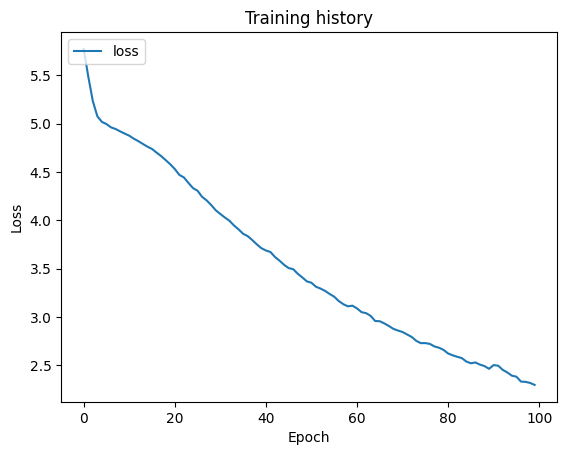

In [73]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

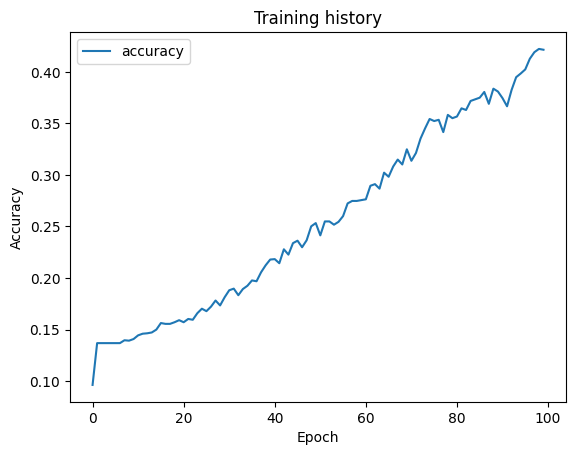

In [74]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()